In [ ]:
from fastai.vision.all import *
import torch
from ipywidgets import widgets

In [ ]:
import fastai

print(fastai.__version__)

2.5.3


In [ ]:
! find '/content/pnevmoniya' -type f | wc -l

5846


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -av '/content/drive/MyDrive/pnevmoniya' '/content/'

In [ ]:
from fastai.vision.data import get_image_files
path = Path('/content/pnevmoniya/train')
testpath = Path('/content/pnevmoniya/test')
fls = get_image_files(path)
fls

(#5221) [Path('/content/pnevmoniya/train/NORMAL/NORMAL2-IM-1310-0001.jpeg'),Path('/content/pnevmoniya/train/NORMAL/NORMAL2-IM-1244-0001.jpeg'),Path('/content/pnevmoniya/train/NORMAL/NORMAL2-IM-0839-0001.jpeg'),Path('/content/pnevmoniya/train/NORMAL/IM-0166-0001.jpeg'),Path('/content/pnevmoniya/train/NORMAL/NORMAL2-IM-0790-0001.jpeg'),Path('/content/pnevmoniya/train/NORMAL/NORMAL2-IM-0490-0001.jpeg'),Path('/content/pnevmoniya/train/NORMAL/IM-0226-0001.jpeg'),Path('/content/pnevmoniya/train/NORMAL/IM-0222-0001.jpeg'),Path('/content/pnevmoniya/train/NORMAL/NORMAL2-IM-0976-0001.jpeg'),Path('/content/pnevmoniya/train/NORMAL/IM-0617-0001.jpeg')...]

In [ ]:
failed = verify_images(testpath)
failed

zip argument #1 must support iteration


(#0) []

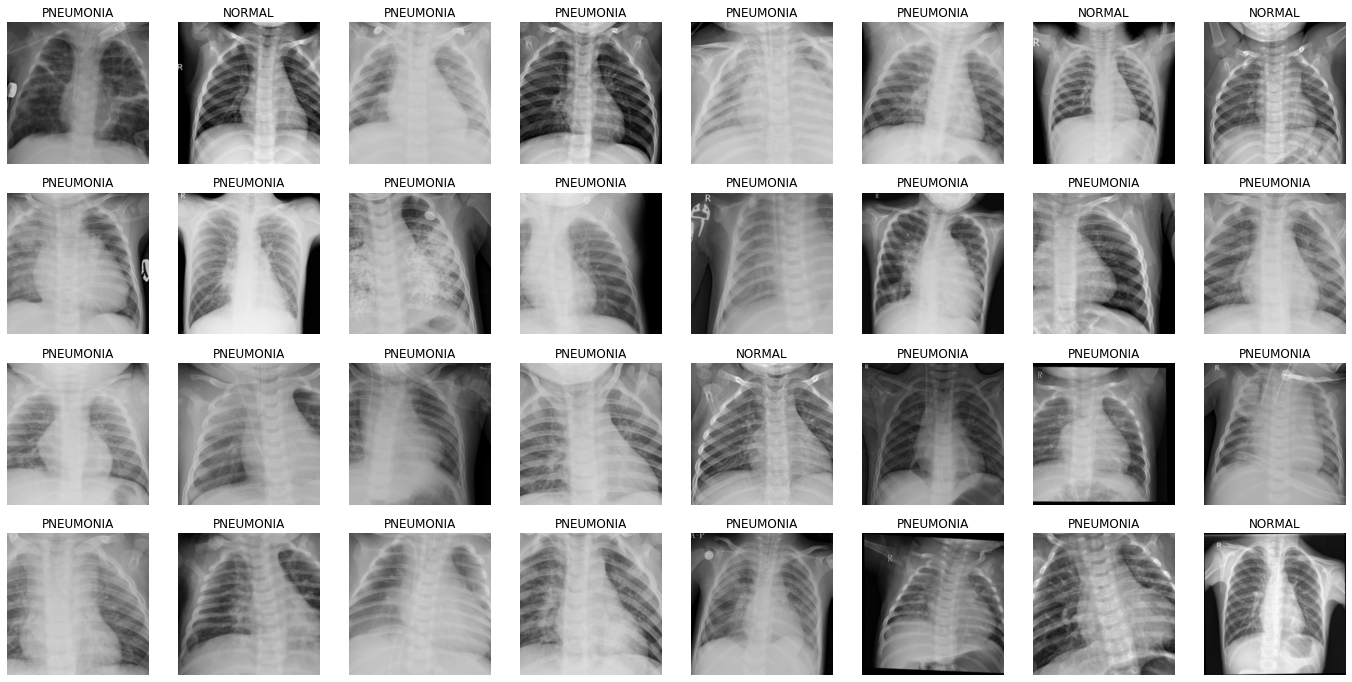

In [ ]:
pnevmoniya = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.01, seed=42),
    get_y = parent_label,
    item_tfms=Resize(224)
)

dls = pnevmoniya.dataloaders(path)

dls.train.show_batch(max_n=32, nrows=4)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.400166,0.303127,0.923077,01:33


epoch,train_loss,valid_loss,accuracy,time
0,0.149789,0.166007,0.980769,01:35
1,0.084792,0.398444,0.961538,01:36
2,0.070187,0.047140,0.980769,01:35
3,0.046765,0.080985,0.980769,01:35
4,0.031185,0.025663,0.980769,01:36
5,0.021403,0.308208,0.942308,01:35
6,0.019757,0.000600,1.000000,01:34
7,0.011257,0.000916,1.000000,01:35
8,0.008642,0.016648,1.000000,01:36
9,0.004960,0.007374,1.000000,01:34


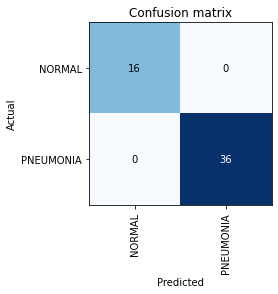

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
import os

rasmnomi = []
xulosa = []
test = []

obj = os.scandir('/content/pnevmoniya/test/')
for entry in obj:
  if entry.is_file():
    img = PILImage.create(entry.path)
    pred, pred_id, probs = learn.predict(img)
    rasmnomi.append(entry.name.replace("'", ""))
    test.append(f'{entry.name} - > 1')
    if pred=='PNEUMONIA':
      xulosa.append(1)
    else:
      xulosa.append(0)
      


In [ ]:
tay = {
    "id": rasmnomi,
    "labels": xulosa
}

In [ ]:
yechim = pd.DataFrame(tay)

In [ ]:
yechim.index = yechim['id']
yechim.drop(['id'], axis=1, inplace=True)

In [ ]:
yechim.to_csv('yechim.csv')

Bashorat PNEUMONIA
Ehtimollik 0.9999839067459106


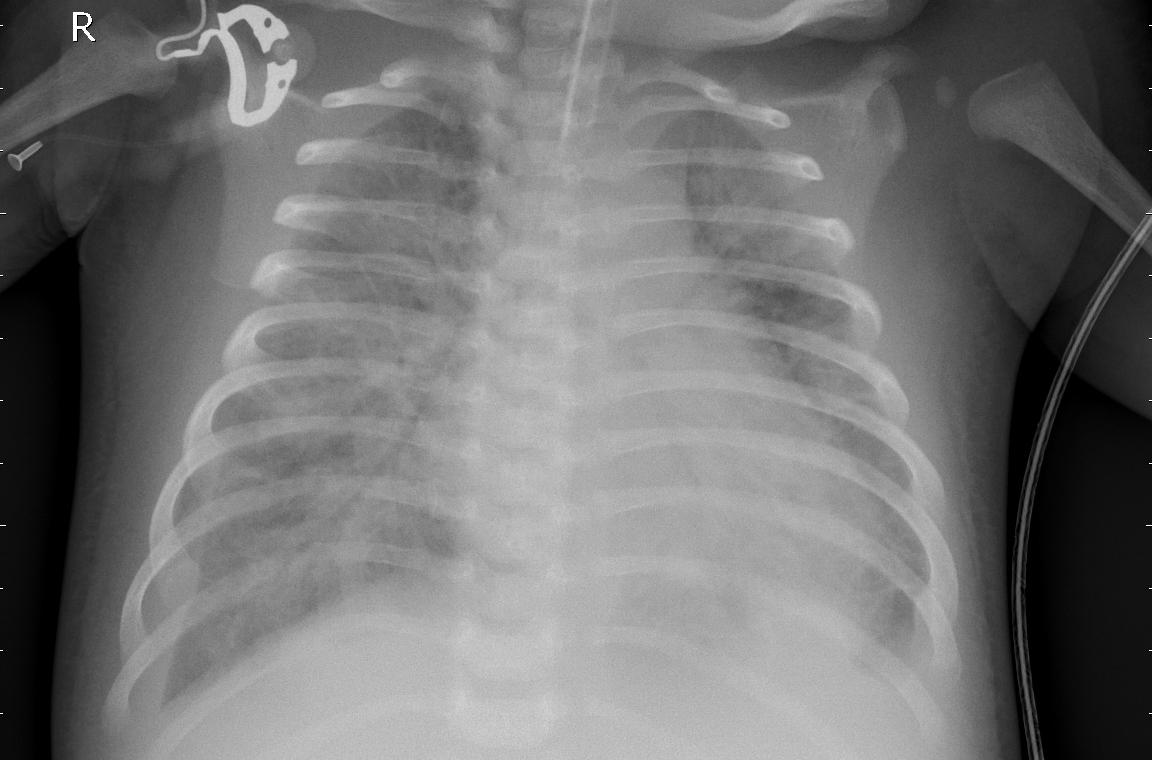

In [ ]:
# img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat {pred}')
print(f'Ehtimollik {probs[pred_id]}')
img